# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [40]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [41]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [42]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [43]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [44]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [45]:
from keras.models import Sequential
from keras.layers import Dense

In [46]:
#建立模型

In [47]:
model = Sequential()

In [48]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [49]:
# 建搆隱藏層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

In [50]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [51]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)              

# 訓練模型

In [52]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [53]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 183us/step - loss: 0.3209 - accuracy: 0.9044 - val_loss: 0.1572 - val_accuracy: 0.9561
Epoch 2/10
48000/48000 [==============================] - 10s 212us/step - loss: 0.1413 - accuracy: 0.9622 - val_loss: 0.1274 - val_accuracy: 0.9678
Epoch 3/10
48000/48000 [==============================] - 10s 209us/step - loss: 0.1109 - accuracy: 0.9719 - val_loss: 0.1057 - val_accuracy: 0.9725
Epoch 4/10
48000/48000 [==============================] - 10s 217us/step - loss: 0.0884 - accuracy: 0.9778 - val_loss: 0.1145 - val_accuracy: 0.9730
Epoch 5/10
48000/48000 [==============================] - 10s 201us/step - loss: 0.0759 - accuracy: 0.9799 - val_loss: 0.1214 - val_accuracy: 0.9719
Epoch 6/10
48000/48000 [==============================] - 10s 200us/step - loss: 0.0623 - accuracy: 0.9847 - val_loss: 0.1161 - val_accuracy: 0.9737
Epoch 7/10
48000/48000 [==============================] -

# 以圖形顯示訓練過程

In [54]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

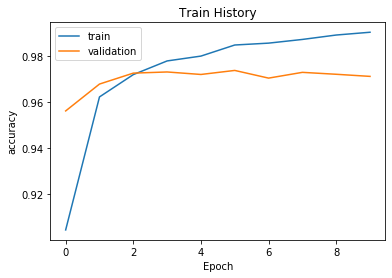

In [55]:
show_train_history(train_history,'accuracy','val_accuracy')

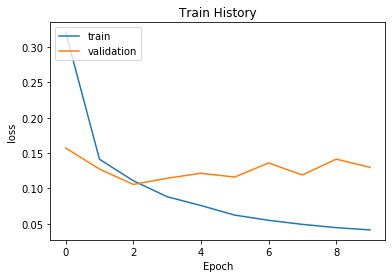

In [56]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [57]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 44us/step

accuracy= 0.9732000231742859


<ol>
    <font color=#0099ff size=5 face="黑體">新增隱藏層</font>
<font color=#FF4500 size=3 face="黑體"><li>新增一層比原先準確率=0.9786下降為0.9796 </li></font>
<font color=#FF4500 size=3 face="黑體"><li>新增兩層比原先準確率下降為0.9779</li></font> 
<font color=#FF4500 size=3 face="黑體"><li>新增六層比原先準確率下降為0.9732</li></font> 
</ol>